In [ ]:
#   Filip Przychodni
#   Lista 2

In [2]:
#   Importowanie bibliotek
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
import random
from scipy.integrate import RK45
import matplotlib.pyplot as plt

In [5]:
#  Zadanie 1
Image(url= "./List2_images/Zadanie1_tresc.png")

In [ ]:
# Podpunkt (a) model SI

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(N)
s_i = lambda t, s, i:  ((-beta * i * s )/ N)
i_i = lambda t, s, i:  beta * i * s / N

S = np.zeros(N)
I = np.zeros(N)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SI_euler.png', dpi=300)
plt.show()

plt.figure(2)
plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SI_euler_log.png', dpi=300)
plt.show()

In [ ]:
# Podpunkt (b) model SIS

def SIS(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N + gamma * I0
    I1 = beta * I0 * S0 / N - gamma * I0
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(N)
s_i = lambda t, s, i:  -beta * i * s / N + gamma * i
i_i = lambda t, s, i:  beta * i * s / N - gamma * i

S = np.zeros(N)
I = np.zeros(N)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SI.png', dpi=300)
plt.show()

plt.figure(2)
plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SIS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SIS_euler_log.png', dpi=300)
plt.show()

In [ ]:
# Podpunkt (c) model SIRS

def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(N)
s_i = lambda t, s, i, r: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r: beta * i * s / N - gamma * i
r_i = lambda t, s, i, r: gamma * i - eta * r

S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)
S[0] = N-1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], R[:100], label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SIRS_Euler.png', dpi=300)
plt.show()

plt.figure(2)
plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(R[:100]), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SIRS_euler_log.png', dpi=300)
plt.show()

In [ ]:
#  Zadanie 2
Image(url= "./List2_images/Zadanie2_tresc.png")

In [ ]:
# Podpunkt (a) model SI
def SI(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N
    I1 = beta * I0 * S0 / N
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)

T_ode = np.zeros(steps)
Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SI(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = N - S - I

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SI_Dopri.png', dpi=300)
plt.show()

plt.plot(T_ode, np.log(S), label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, np.log(I), label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SI_Dopri_log.png', dpi=300)
plt.show()


In [ ]:
# Podpunkt (b) model SIS

def SIS(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N + gamma * I0
    I1 = beta * I0 * S0 / N - gamma * I0
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)

T_ode = np.zeros(steps)
Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIS(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = N - S - I

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SIS_Dopri.png', dpi=300)
plt.show()

plt.plot(T_ode, np.log(S), label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, np.log(I), label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SIS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SIS_Dopri_log.png', dpi=300)
plt.show()

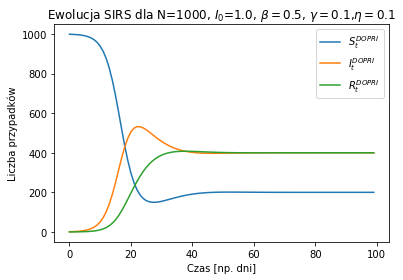

ipykernel_launcher:45: RuntimeWarning: divide by zero encountered in log


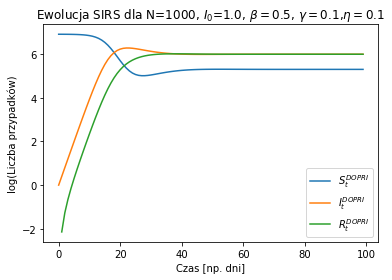

In [28]:
# Podpunkt (c) model SIRS

def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
gamma = .1
eta = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 3))
Y[0, :] = [N - 1, 1, 0] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIRS(t, y, [beta, gamma, N, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = Y[:, 2] 

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, R, label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\eta = ' + f'{eta}$')
plt.legend()
# plt.savefig('SIRS_Dopri.png', dpi=300)
plt.show()

plt.plot(T_ode, np.log(S), label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, np.log(I), label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, np.log(R), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\eta = ' + f'{eta}$')
plt.legend()
# plt.savefig('SIRS_Dopri_log.png', dpi=300)
plt.show()

In [6]:
#  Zadanie 3
Image(url= "./List2_images/Zadanie3_tresc.png")

In [ ]:
# Podpunkt (d) model SEIR dla metody DOPRI

def SEIR(t, y, params):
    beta, gamma, N, sigma = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N-1, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIR(t, y, [beta, gamma, N, sigma]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = Y[:, 2]
E = Y[:, 3] 

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, E, label=r'$E_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, R, label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.ylim([0,1000])

print(Y[35:40,:])
plt.title(f'Ewolucja SEIR dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIEIR_DOPRI.png', dpi=300)
plt.show()

plt.plot(T_ode, np.log(S), label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, np.log(E), label=r'$E_t^{DOPRI}$')
plt.plot(T_ode, np.log(I), label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, np.log(R), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')

plt.title(f'Ewolucja SEIR dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIEIR_DOPRI_log.png', dpi=300)
plt.show()

In [ ]:
# Podpunkt (d) model SEIR dla metody Eulera

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)
E = np.zeros(N)
T_ode = np.zeros(N)
S[0] = N-1
I[0] = 1
R[0] = 0
E[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], E[:100], label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], R[:100], label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.ylim([0,1000])
plt.title(f'Ewolucja SEIR dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIER_Euler.png', dpi=300)
plt.show()

plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(E[:100]), label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(R[:100]), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SEIR dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIER_Euler_log.png', dpi=300)
plt.show()

In [ ]:
# Podpunkt (e) model SEIRS dla metody DOPRI
def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N - 3, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIRS(t, y, [beta, gamma, N, sigma, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
E = Y[:, 1]
I = Y[:, 2]
R = Y[:, 3] 

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, E, label=r'$E_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, R, label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
# plt.ylim([0,1000])
plt.title(f'Ewolucja SEIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$ '  + '$\\eta = ' + f'{eta}$')
plt.legend()
# plt.savefig('SEIRS_DOPRI.png', dpi=300)
plt.show()

plt.plot(T_ode, np.log(S), label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, np.log(E), label=r'$E_t^{DOPRI}$')
plt.plot(T_ode, np.log(I), label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, np.log(R), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
# plt.ylim([0,1000])
plt.title(f'Ewolucja SEIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$ '  + '$\\eta = ' + f'{eta}$')
plt.legend()
# plt.savefig('SEIRS_DOPRI_log.png', dpi=300)
plt.show()

In [ ]:
# Podpunkt (e) model SEIRS dla metody Eulera

def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i - eta * r
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)
E = np.zeros(N)
T_ode = np.zeros(N)
S[0] = N-1
I[0] = 1
R[0] = 0
E[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], E[:100], label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], R[:100], label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.ylim([0,1000])
plt.title(f'Ewolucja SEIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIERS_Euler.png', dpi=300)
plt.show()

plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(E[:100]), label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(R[:100]), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SEIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIERS_Euler_log.png', dpi=300)
plt.show()

In [26]:
#  Zadanie 4
Image(url= "./List2_images/Zadanie4_tresc.png")
# delta
# albo średnia z błędu (błąd bezwzględny lub RMS)

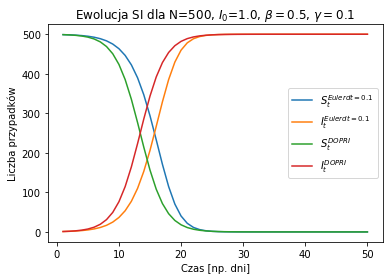

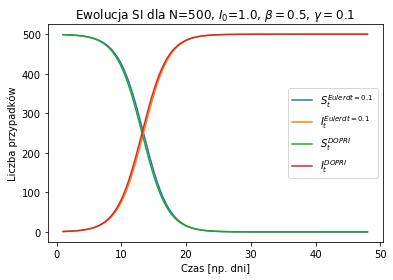

[13.82666933767525, 4.6335941985708065]


In [4]:
# Wykresy dla delta t=1

# parametry
beta = .5
gamma = .1
N = 500
T = 50
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, dt)
s_i = lambda t, s, i:  ((-beta * i * s )/ N)
i_i = lambda t, s, i:  beta * i * s / N

S = np.zeros(steps)
I = np.zeros(steps)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

SI_euler_s = S[:100]
SI_euler_i = I[:100]

def SI(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N
    I1 = beta * I0 * S0 / N
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 500
T = 50
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  

steps = int(T / dt)

T_ode = np.zeros(steps)
Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SI(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = N - S_Dopri - I_Dopri

S_dt1 = S_Dopri - SI_euler_s
I_dt1 = I_Dopri - SI_euler_i

SRMS_dt1 = np.power(np.sum(np.power(S_dt1,2)/N),0.5)

plt.plot(N_arr[:50], SI_euler_s, label=r'$S_t^{Euler dt = 0.1}$')
plt.plot(N_arr[:50], SI_euler_i, label=r'$I_t^{Euler dt = 0.1}$')
plt.plot(N_arr[:50], S_Dopri, label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:50], I_Dopri, label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SI_Dopri.png', dpi=300)
plt.show()

dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i:  ((-beta * i * s )/ N)
i_i = lambda t, s, i:  beta * i * s / N

S = np.zeros(steps)
I = np.zeros(steps)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,T,steps)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x]) # dt = 0.1
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

SI_euler_s = S
SI_euler_i = I

Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SI(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = N - S_Dopri - I_Dopri

S_dt01 = S_Dopri - SI_euler_s
I_dt01 = I_Dopri - SI_euler_i

SRMS_dt01 = np.power(np.sum(np.power(S_dt01,2)/N),0.5)
plt.plot(N_arr, SI_euler_s, label=r'$S_t^{Euler dt = 0.1}$')
plt.plot(N_arr, SI_euler_i, label=r'$I_t^{Euler dt = 0.1}$')
plt.plot(N_arr, S_Dopri, label=r'$S_t^{DOPRI}$')
plt.plot(N_arr, I_Dopri, label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SI_Dopri.png', dpi=300)
plt.show()
print([SRMS_dt1,SRMS_dt01])

In [5]:
beta = .5
gamma = .1
N = 500
T = 50
dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
t = np.arange(0, 1 + dt, dt)
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i:  ((-beta * i * s )/ N)
i_i = lambda t, s, i:  beta * i * s / N

S = np.zeros(steps)
I = np.zeros(steps)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

SI_euler_s = S
SI_euler_i = I

Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SI(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = N - S_Dopri - I_Dopri

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

print([SRMS_dt001])

[1.4730953998058074]


In [6]:
beta = .5
gamma = .1
N = 500
T = 50
dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i:  ((-beta * i * s )/ N)
i_i = lambda t, s, i:  beta * i * s / N

S = np.zeros(steps)
I = np.zeros(steps)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,steps,steps)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

SI_euler_s = S
SI_euler_i = I

Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SI(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = N - S_Dopri - I_Dopri

S_dt0001 = S_Dopri - SI_euler_s
I_dt0001 = I_Dopri - SI_euler_i

SRMS_dt0001 = np.power(np.sum(np.power(S_dt0001,2)/N),0.5)

# plt.plot(N_arr, S, label=r'$S_t^{Euler}$')
# plt.plot(N_arr, I, label=r'$I_t^{Euler}$')
# plt.plot(N_arr, S_Dopri, label=r'$S_t^{DOPRI}$')
# plt.plot(N_arr, I_Dopri, label=r'$I_t^{DOPRI}$')
# plt.xlabel('Czas [np. dni]')
# plt.ylabel('Liczba przypadków')
# plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
# plt.legend()
# plt.savefig('SI_Dopri.png', dpi=300)
# plt.show()

print([SRMS_dt0001])

[0.46607973018569826]


In [27]:
#  Zadanie 5
Image(url= "./List2_images/Zadanie5_tresc.png")

0.04995
0.04995
0.04995
2
0.0998
0.0998
0.0998
0.0998
0.0998
0.0998
0.0998
0.0998
10
0.14955
0.14955
12
0.1992
0.1992
14
0.24875
0.24875
16
0.2982
17
0.34755
18
0.3968
0.3968
0.3968
0.3968
22
0.44595
23
0.495
0.495
0.495
0.495
27
0.54395
28
0.5928
29
0.64155
0.64155
0.64155
0.64155
33
0.6902
34
0.73875
35
0.7872
36
0.83555
37
0.8838
0.8838
39
0.93195
40
0.98
41
1.02795
42
1.0758
43
1.12355
44
1.1712
45
1.21875
46
1.2662
47
1.31355
48
1.3608
49
1.40795
50
1.455
51
1.50195
52
1.5488
53
1.59555
54
1.6422
55
1.68875
56
1.7352
57
1.78155
58
1.8278
59
1.87395
60
1.92
61
1.96595
62
2.0118
63
2.05755
64
2.1032
65
2.14875
66
2.1942
67
2.23955
68
2.2848
69
2.32995
70
2.375
71
2.41995
72
2.4648
73
2.50955
74
2.5542
75
2.59875
76
2.6432
77
2.68755
78
2.7318
79
2.77595
80
2.82
81
2.86395
82
2.9078
83
2.95155
84
2.9952
85
3.03875
86
3.0822
87
3.12555
88
3.1688
89
3.21195
90
3.255
91
3.29795
92
3.3408
93
3.38355
94
3.4262
95
3.46875
96
3.5112
97
3.55355
98


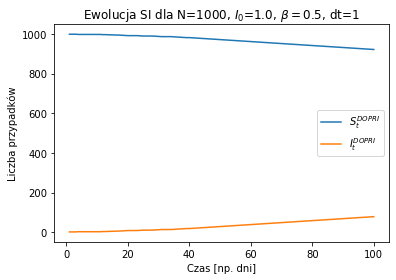

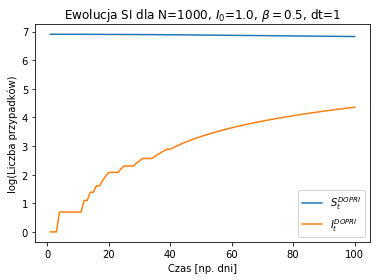

In [16]:
# Podpunkt (a) model SI

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(N)
s_i = lambda t, s, i:  ((-beta * i * s )/ N)
i_i = lambda t, s, i:  beta * i * s / N

S = np.zeros(T)
I = np.zeros(T)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

u1 = np.random.rand(T)
u2 = np.random.rand(T)

# for x in range(N-1):
#     S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
#     I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])
for x in range(T-1):
    print(beta*I[x]*S[x]/T**2)
    if u1[x]<beta*I[x]*S[x]/T**2:
        print(x)
        S[x+1] = S[x] - 1
        I[x+1] = I[x] + 1
    else:
        S[x+1] = S[x]
        I[x+1] = I[x]

plt.plot(N_arr[:T], S[:], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:T], I[:], label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SI_euler.png', dpi=300)
plt.show()

plt.figure(2)
plt.plot(N_arr[:T], np.log(S[:]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:T], np.log(I[:]), label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SI_euler_log.png', dpi=300)
plt.show()


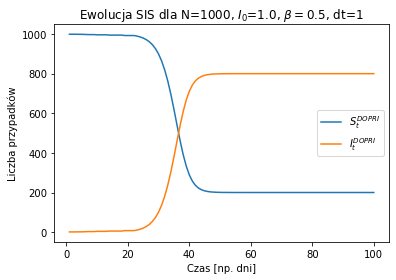

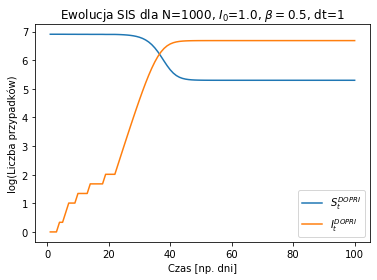

In [32]:
# Podpunkt (b) model SIS
def SIS(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N + gamma * I0
    I1 = beta * I0 * S0 / N - gamma * I0
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(N)
s_i = lambda t, s, i:  -beta * i * s / N + gamma * i
i_i = lambda t, s, i:  beta * i * s / N - gamma * i

S = np.zeros(N)
I = np.zeros(N)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

u1 = np.random.rand(1000)
u2 = np.random.rand(1000)

for x in range(N-1):
    if u1[x]<beta*I[x]*S[x]/N**2 + gamma * I[x]:
        S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
        I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])
    else:
        S[x+1] = S[x]
        I[x+1] = I[x] 

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SI.png', dpi=300)
plt.show()

plt.figure(2)
plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SIS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SIS_euler_log.png', dpi=300)
plt.show()

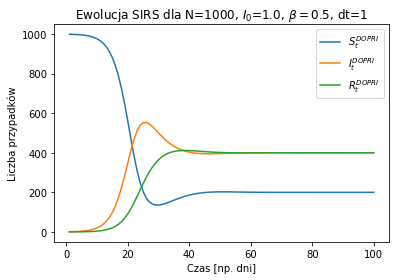

ipykernel_launcher:50: RuntimeWarning: divide by zero encountered in log


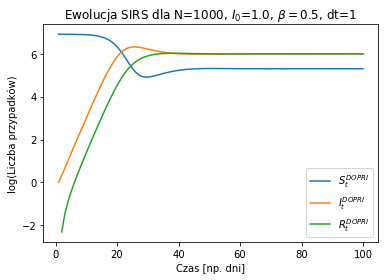

In [29]:
# Podpunkt (c) model SIRS

def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(N)
s_i = lambda t, s, i, r: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r: beta * i * s / N - gamma * i
r_i = lambda t, s, i, r: gamma * i - eta * r

S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)
S[0] = N-1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], R[:100], label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SIRS_Euler.png', dpi=300)
plt.show()

plt.figure(2)
plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(R[:100]), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + 'dt=' + f'{dt}')
plt.legend()
# plt.savefig('SIRS_euler_log.png', dpi=300)
plt.show()

In [31]:
#  Zadanie 6
Image(url= "./List2_images/Zadanie6_tresc.png")

In [ ]:
# Podpunkt (d) model SEIR dla metody Eulera

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)
E = np.zeros(N)
T_ode = np.zeros(N)
S[0] = N-1
I[0] = 1
R[0] = 0
E[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], E[:100], label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], R[:100], label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.ylim([0,1000])
plt.title(f'Ewolucja SEIR dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIER_Euler.png', dpi=300)
plt.show()

plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(E[:100]), label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(R[:100]), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SEIR dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIER_Euler_log.png', dpi=300)
plt.show()

In [ ]:
# Podpunkt (e) model SEIRS dla metody Eulera

def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i - eta * r
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)
E = np.zeros(N)
T_ode = np.zeros(N)
S[0] = N-1
I[0] = 1
R[0] = 0
E[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

plt.plot(N_arr[:100], S[:100], label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], E[:100], label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], I[:100], label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], R[:100], label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.ylim([0,1000])
plt.title(f'Ewolucja SEIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIERS_Euler.png', dpi=300)
plt.show()

plt.plot(N_arr[:100], np.log(S[:100]), label=r'$S_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(E[:100]), label=r'$E_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(I[:100]), label=r'$I_t^{DOPRI}$')
plt.plot(N_arr[:100], np.log(R[:100]), label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('log(Liczba przypadków)')
plt.title(f'Ewolucja SEIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIERS_Euler_log.png', dpi=300)
plt.show()

In [41]:
#  Zadanie 7
Image(url= "./List2_images/Zadanie7_tresc.png")

In [42]:
#  Zadanie 8
Image(url= "./List2_images/Zadanie8_tresc.png")

In [43]:
#  Zadanie 9
Image(url= "./List2_images/Zadanie9_tresc.png")

ipykernel_launcher:40: RuntimeWarning: divide by zero encountered in log


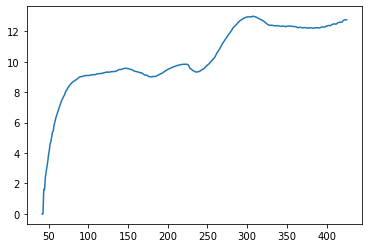

[Text(0, 1, 'Marzec 2020'),
 Text(0, 1, 'Czerwiec 2020'),
 Text(0, 1, 'Wrzesień 2020'),
 Text(0, 1, 'Grudzień 2020'),
 Text(0, 1, 'Marzec 2021')]

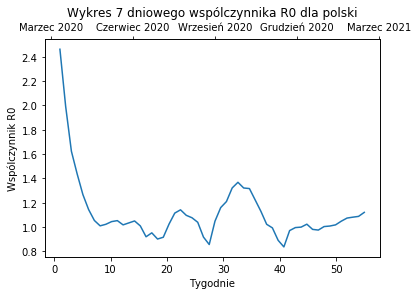

In [115]:
import csv
from sklearn.linear_model import LinearRegression

confirmed_arr = []

with open('confirmed.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Poland':
            confirmed_arr = lines[4:]

deaths_arr = []

with open('deaths.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Poland':
            deaths_arr = lines[4:]

recovered_arr = []

with open('recovered.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Poland':
            recovered_arr = lines[4:]

for x in range(len(recovered_arr)):
    recovered_arr[x] = int(recovered_arr[x])
    deaths_arr[x] = int(deaths_arr[x])
    confirmed_arr[x] = int(confirmed_arr[x])

I_t = []
for x in range(len(recovered_arr)):
    I_t.append(confirmed_arr[x] - deaths_arr[x] - recovered_arr[x])
I_t = np.array(I_t)
log_I_t = np.log(I_t)

plt.plot(log_I_t)
plt.show()

dt = 1
slope_arr = []
b_0 = []
temp_int = 0
for x in range(46,424,7):

    x_tydzien = np.linspace(x+1,x+7,7)
    y_tydzien = log_I_t[x:x+7]
    y_tydzien = np.array(y_tydzien)
    x_tydzien = np.array(x_tydzien)
    # if len(x_tydzien)<7:
    # print(x_tydzien.reshape((-1, 1)))
    # print(y_tydzien)
    # print(x_tydzien.reshape((-1, 1)).shape)
    # print(y_tydzien.shape)
        # break

    if ~np.isfinite(y_tydzien).any():
        slope_arr.append(float(0))
        b_0.append(float(0))
        continue

    model = LinearRegression()

    model = LinearRegression().fit(x_tydzien.reshape((-1, 1)), y_tydzien)
    slope_arr.append(float(model.coef_))
    b_0.append(float(model.intercept_))

marzec_22 = 0
marzec_4 = 0
with open('recovered.csv', mode='r') as csv_file:
    indexData = csv.reader(csv_file)

    index = 0
    for lines in indexData: 
        for dat in lines:
            if dat == '3/4/20':
                marzec_4 = index
            if dat == '3/22/21':
                marzec_22 = index
            index +=1
# print([marzec_4,marzec_22])
slope_arr = np.array(slope_arr)
# print(slope_arr)
R_0 = slope_arr/0.25 + 1
# print(len(slope_arr))
fig,axs = plt.subplots()
ax0 = axs.twiny()
axs.plot(np.linspace(1,55,54),R_0)
axs.set_title("Wykres 7 dniowego wspólczynnika R0 dla polski")
axs.set_xlabel("Tygodnie")
axs.set_ylabel("Wspólczynnik R0")
ax0.set_xticks(np.linspace(1,55,5))
ax0.set_xticklabels(['Marzec 2020', 'Czerwiec 2020', 'Wrzesień 2020', "Grudzień 2020", "Marzec 2021" ])

In [108]:
#  Zadanie 10
Image(url= "./List2_images/Zadanie10_tresc.png")

ipykernel_launcher:39: RuntimeWarning: divide by zero encountered in log


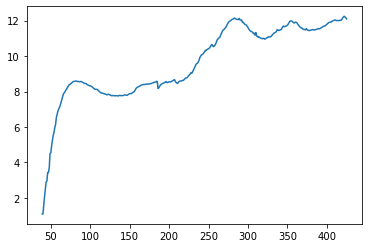

[Text(0, 1, 'Marzec 2020'),
 Text(0, 1, 'Czerwiec 2020'),
 Text(0, 1, 'Wrzesień 2020'),
 Text(0, 1, 'Grudzień 2020'),
 Text(0, 1, 'Marzec 2021')]

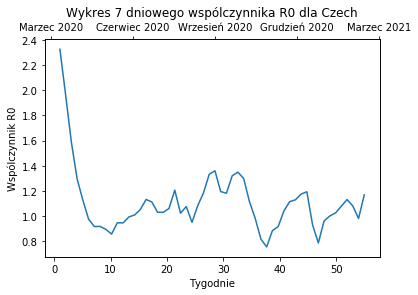

In [118]:
# Czechy

confirmed_arr = []

with open('confirmed.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Czechia':
            confirmed_arr = lines[4:]

deaths_arr = []

with open('deaths.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Czechia':
            deaths_arr = lines[4:]

recovered_arr = []

with open('recovered.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Czechia':
            recovered_arr = lines[4:]

for x in range(len(recovered_arr)):
    recovered_arr[x] = int(recovered_arr[x])
    deaths_arr[x] = int(deaths_arr[x])
    confirmed_arr[x] = int(confirmed_arr[x])

I_t = []
for x in range(len(recovered_arr)):
    I_t.append(confirmed_arr[x] - deaths_arr[x] - recovered_arr[x])
I_t = np.array(I_t)
log_I_t = np.log(I_t)

plt.plot(log_I_t)
plt.show()

dt = 1
slope_arr = []
b_0 = []
temp_int = 0
for x in range(46,424,7):

    x_tydzien = np.linspace(x+1,x+7,7)
    y_tydzien = log_I_t[x:x+7]
    y_tydzien = np.array(y_tydzien)
    x_tydzien = np.array(x_tydzien)
    # if len(x_tydzien)<7:
    # print(x_tydzien.reshape((-1, 1)))
    # print(y_tydzien)
    # print(x_tydzien.reshape((-1, 1)).shape)
    # print(y_tydzien.shape)
        # break

    if ~np.isfinite(y_tydzien).any():
        slope_arr.append(float(0))
        b_0.append(float(0))
        continue

    model = LinearRegression()

    model = LinearRegression().fit(x_tydzien.reshape((-1, 1)), y_tydzien)
    slope_arr.append(float(model.coef_))
    b_0.append(float(model.intercept_))

marzec_22 = 0
marzec_4 = 0
with open('recovered.csv', mode='r') as csv_file:
    indexData = csv.reader(csv_file)

    index = 0
    for lines in indexData: 
        for dat in lines:
            if dat == '3/4/20':
                marzec_4 = index
            if dat == '3/22/21':
                marzec_22 = index
            index +=1
# print([marzec_4,marzec_22])
slope_arr = np.array(slope_arr)
# print(slope_arr)
R_0 = slope_arr/0.25 + 1
# print(len(slope_arr))
fig,axs = plt.subplots()
ax0 = axs.twiny()
axs.plot(np.linspace(1,55,54),R_0)
axs.set_title("Wykres 7 dniowego wspólczynnika R0 dla Czech")
axs.set_xlabel("Tygodnie")
axs.set_ylabel("Wspólczynnik R0")
ax0.set_xticks(np.linspace(1,55,5))
ax0.set_xticklabels(['Marzec 2020', 'Czerwiec 2020', 'Wrzesień 2020', "Grudzień 2020", "Marzec 2021" ])

ipykernel_launcher:39: RuntimeWarning: divide by zero encountered in log


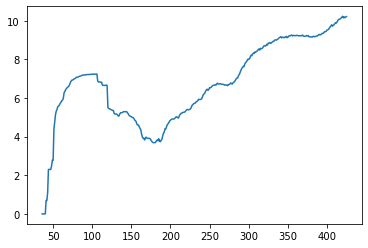

[Text(0, 1, 'Marzec 2020'),
 Text(0, 1, 'Czerwiec 2020'),
 Text(0, 1, 'Wrzesień 2020'),
 Text(0, 1, 'Grudzień 2020'),
 Text(0, 1, 'Marzec 2021')]

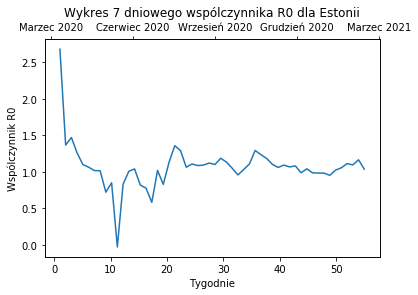

In [117]:
# Estonia

confirmed_arr = []

with open('confirmed.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Estonia':
            confirmed_arr = lines[4:]

deaths_arr = []

with open('deaths.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Estonia':
            deaths_arr = lines[4:]

recovered_arr = []

with open('recovered.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Estonia':
            recovered_arr = lines[4:]

for x in range(len(recovered_arr)):
    recovered_arr[x] = int(recovered_arr[x])
    deaths_arr[x] = int(deaths_arr[x])
    confirmed_arr[x] = int(confirmed_arr[x])

I_t = []
for x in range(len(recovered_arr)):
    I_t.append(confirmed_arr[x] - deaths_arr[x] - recovered_arr[x])
I_t = np.array(I_t)
log_I_t = np.log(I_t)

plt.plot(log_I_t)
plt.show()

dt = 1
slope_arr = []
b_0 = []
temp_int = 0
for x in range(46,424,7):

    x_tydzien = np.linspace(x+1,x+7,7)
    y_tydzien = log_I_t[x:x+7]
    y_tydzien = np.array(y_tydzien)
    x_tydzien = np.array(x_tydzien)
    # if len(x_tydzien)<7:
    # print(x_tydzien.reshape((-1, 1)))
    # print(y_tydzien)
    # print(x_tydzien.reshape((-1, 1)).shape)
    # print(y_tydzien.shape)
        # break

    if ~np.isfinite(y_tydzien).any():
        slope_arr.append(float(0))
        b_0.append(float(0))
        continue

    model = LinearRegression()

    model = LinearRegression().fit(x_tydzien.reshape((-1, 1)), y_tydzien)
    slope_arr.append(float(model.coef_))
    b_0.append(float(model.intercept_))

marzec_22 = 0
marzec_4 = 0
with open('recovered.csv', mode='r') as csv_file:
    indexData = csv.reader(csv_file)

    index = 0
    for lines in indexData: 
        for dat in lines:
            if dat == '3/4/20':
                marzec_4 = index
            if dat == '3/22/21':
                marzec_22 = index
            index +=1
# print([marzec_4,marzec_22])
slope_arr = np.array(slope_arr)
# print(slope_arr)
R_0 = slope_arr/0.25 + 1
# print(len(slope_arr))
fig,axs = plt.subplots()
ax0 = axs.twiny()
axs.plot(np.linspace(1,55,54),R_0)
axs.set_title("Wykres 7 dniowego wspólczynnika R0 dla Estonii")
axs.set_xlabel("Tygodnie")
axs.set_ylabel("Wspólczynnik R0")
ax0.set_xticks(np.linspace(1,55,5))
ax0.set_xticklabels(['Marzec 2020', 'Czerwiec 2020', 'Wrzesień 2020', "Grudzień 2020", "Marzec 2021" ])

ipykernel_launcher:39: RuntimeWarning: divide by zero encountered in log


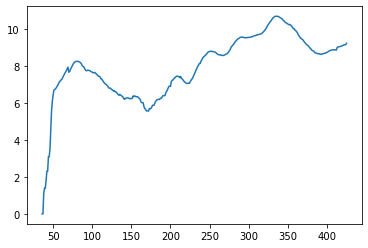

[Text(0, 1, 'Marzec 2020'),
 Text(0, 1, 'Czerwiec 2020'),
 Text(0, 1, 'Wrzesień 2020'),
 Text(0, 1, 'Grudzień 2020'),
 Text(0, 1, 'Marzec 2021')]

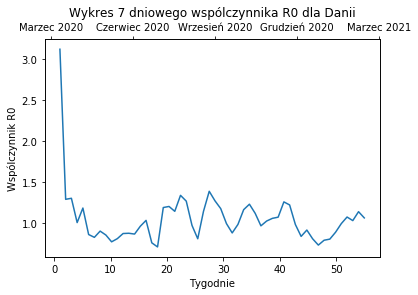

In [116]:
# Dania

confirmed_arr = []

with open('confirmed.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Denmark':
            confirmed_arr = lines[4:]

deaths_arr = []

with open('deaths.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Denmark':
            deaths_arr = lines[4:]

recovered_arr = []

with open('recovered.csv', mode='r') as csv_file:
    next(csv_file)
    indexData = csv.reader(csv_file)
    for lines in indexData: 
        if lines[1]=='Denmark':
            recovered_arr = lines[4:]

for x in range(len(recovered_arr)):
    recovered_arr[x] = int(recovered_arr[x])
    deaths_arr[x] = int(deaths_arr[x])
    confirmed_arr[x] = int(confirmed_arr[x])

I_t = []
for x in range(len(recovered_arr)):
    I_t.append(confirmed_arr[x] - deaths_arr[x] - recovered_arr[x])
I_t = np.array(I_t)
log_I_t = np.log(I_t)

plt.plot(log_I_t)
plt.show()

dt = 1
slope_arr = []
b_0 = []
temp_int = 0
for x in range(46,424,7):

    x_tydzien = np.linspace(x+1,x+7,7)
    y_tydzien = log_I_t[x:x+7]
    y_tydzien = np.array(y_tydzien)
    x_tydzien = np.array(x_tydzien)
    # if len(x_tydzien)<7:
    # print(x_tydzien.reshape((-1, 1)))
    # print(y_tydzien)
    # print(x_tydzien.reshape((-1, 1)).shape)
    # print(y_tydzien.shape)
        # break

    if ~np.isfinite(y_tydzien).any():
        slope_arr.append(float(0))
        b_0.append(float(0))
        continue

    model = LinearRegression()

    model = LinearRegression().fit(x_tydzien.reshape((-1, 1)), y_tydzien)
    slope_arr.append(float(model.coef_))
    b_0.append(float(model.intercept_))

marzec_22 = 0
marzec_4 = 0
with open('recovered.csv', mode='r') as csv_file:
    indexData = csv.reader(csv_file)

    index = 0
    for lines in indexData: 
        for dat in lines:
            if dat == '3/4/20':
                marzec_4 = index
            if dat == '3/22/21':
                marzec_22 = index
            index +=1
# print([marzec_4,marzec_22])
slope_arr = np.array(slope_arr)
# print(slope_arr)
R_0 = slope_arr/0.25 + 1
# print(len(slope_arr))
fig,axs = plt.subplots()
ax0 = axs.twiny()
axs.plot(np.linspace(1,55,54),R_0)
axs.set_title("Wykres 7 dniowego wspólczynnika R0 dla Danii")
axs.set_xlabel("Tygodnie")
axs.set_ylabel("Wspólczynnik R0")
ax0.set_xticks(np.linspace(1,55,5))
ax0.set_xticklabels(['Marzec 2020', 'Czerwiec 2020', 'Wrzesień 2020', "Grudzień 2020", "Marzec 2021" ])